# Titanic_EDA_Harshitha

# (1) LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data:

In [2]:
data = pd.read_csv('project.csv', index_col=0)

In [3]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.000000,1,0,7.25000,1,0,1
2,1,1,38.000000,1,0,14.45420,0,0,0
3,1,3,26.000000,0,0,7.92500,0,0,1
4,1,1,35.000000,1,0,28.85625,0,0,1
5,0,3,35.000000,0,0,8.05000,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.00000,1,0,1
888,1,1,19.000000,0,0,30.00000,0,0,1
889,0,3,29.699118,1,2,23.45000,0,0,1


In [4]:
data=pd.DataFrame(data,columns=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S','Survived',])
data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
PassengerId,,,,,,,,,
1,3,22.000000,1,0,7.25000,1,0,1,0
2,1,38.000000,1,0,14.45420,0,0,0,1
3,3,26.000000,0,0,7.92500,0,0,1,1
4,1,35.000000,1,0,28.85625,0,0,1,1
5,3,35.000000,0,0,8.05000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.00000,1,0,1,0
888,1,19.000000,0,0,30.00000,0,0,1,1
889,3,29.699118,1,2,23.45000,0,0,1,0


## Defining dependent and independendent variable y & x

In [5]:
x=data.iloc[:,:-1].values
print(x.shape)
x

(891, 8)


array([[ 3.        , 22.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [6]:
y=data.iloc[:,-1].values
print(y.shape)
y

(891,)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## Splitting the data into train and test dataset:

In [7]:
from sklearn.model_selection import train_test_split
##splitting into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=6)

In [8]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,712,8.0
xtest,179,8.0
ytrain,712,NaN
ytest,179,NaN


## Scaling the independent variables

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Building the model:

In [10]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
#fitting the model on train data set
lr.fit(xtrain,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
ypred=lr.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [12]:
ytest

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

## Model evaluation using confusion matrix:

In [13]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[103  10]
 [ 18  48]]


,0
TP,48
TN,103
FP,10
FN,18


### Classification Accuracy:¶

In [14]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 84.35754189944134


### Classification Error:

In [15]:
print("classification error is :",100*(1-accuracy))

classification error is : 15.642458100558654


### calculating   True Positive Rate(TPR),   True Nagative Rate(TNR),                                                                        False Positive Rate(FPR),  False Nagative Rate(FNR)

In [16]:
# TPR=100*met.recall_score(ytest,ypred)
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR','TNR','FPR','FNR'])

,0
TPR,72.727273
TNR,91.150442
FPR,8.849558
FNR,27.272727


In [17]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.827586
F1_score,0.774194
roc_auc,0.819389


### The accuracy of this model is 84.35% for the given test split of 20% and random state=6 

# 2) KNN Classification:
## Splitting the data into train and test dataset:

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=5)

In [19]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,596,8.0
xtest,295,8.0
ytrain,596,NaN
ytest,295,NaN


## Scaling the independent variables

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Building the model:

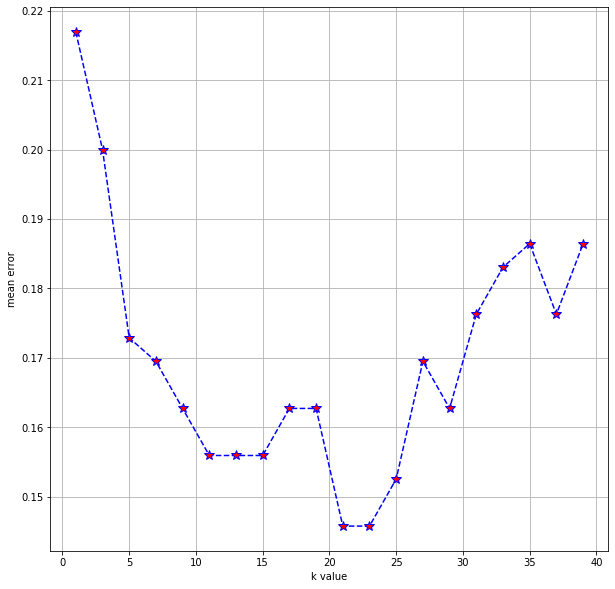

In [21]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    yp=knn.predict(xtest)
    error.append(np.mean(yp!=ytest))
plt.figure(figsize=(10,10))
plt.plot(range(1,40,2),error,color='b',linestyle='dashed',marker='*',markerfacecolor='r',markersize='10')
plt.xlabel('k value')
plt.ylabel('mean error')
plt.grid(True)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [23]:
ypred=knn.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [24]:
ytest

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Model evaluation using confusion matrix:

In [25]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[178   9]
 [ 34  74]]


,0
TP,74
TN,178
FP,9
FN,34


### clasification accuracy: 

In [26]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 85.42372881355932


### classification error:

In [27]:
print("classification error is :",100*(1-accuracy))

classification error is : 14.576271186440682


### Calculating True Positive Rate(TPR), True Nagative Rate(TNR), False Positive Rate(FPR), False Nagative Rate(FNR) 

In [28]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,68.518519
TNR/SPECIFICITY,95.187166
FPR,4.812834
FNR,31.481481


In [29]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.891566
F1_score,0.774869
roc_auc,0.818528


### The accuracy of this model is 85.42% for the given test split of 33% and random state=5 

22 - 0.8585365853658536


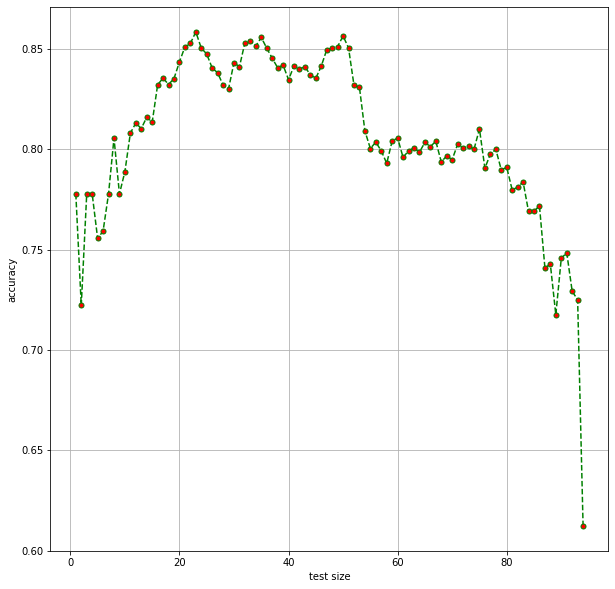

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.neighbors import KNeighborsClassifier
acc=[]
for i in range(1,95,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i/100,random_state=5)
    scaler=StandardScaler()
    xtrain=scaler.fit_transform(xtrain)
    xtest=scaler.transform(xtest)
    knn=KNeighborsClassifier(n_neighbors=21)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    accuracy=met.accuracy_score(ytest,ypred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,95,1),acc,color='g',linestyle='dashed',marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size')
plt.ylabel('accuracy')
plt.grid(True)
print(acc.index(max(acc)),'-',max(acc))

# 3) DECISION TREE Classifier:

## Splitting the data into train and test dataset: 

In [31]:
from sklearn.model_selection import train_test_split
#splitting into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=5)

In [32]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,596,8.0
xtest,295,8.0
ytrain,596,NaN
ytest,295,NaN


## Scaling the independent variables 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Building the model: 

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [35]:
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [36]:
ytest

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


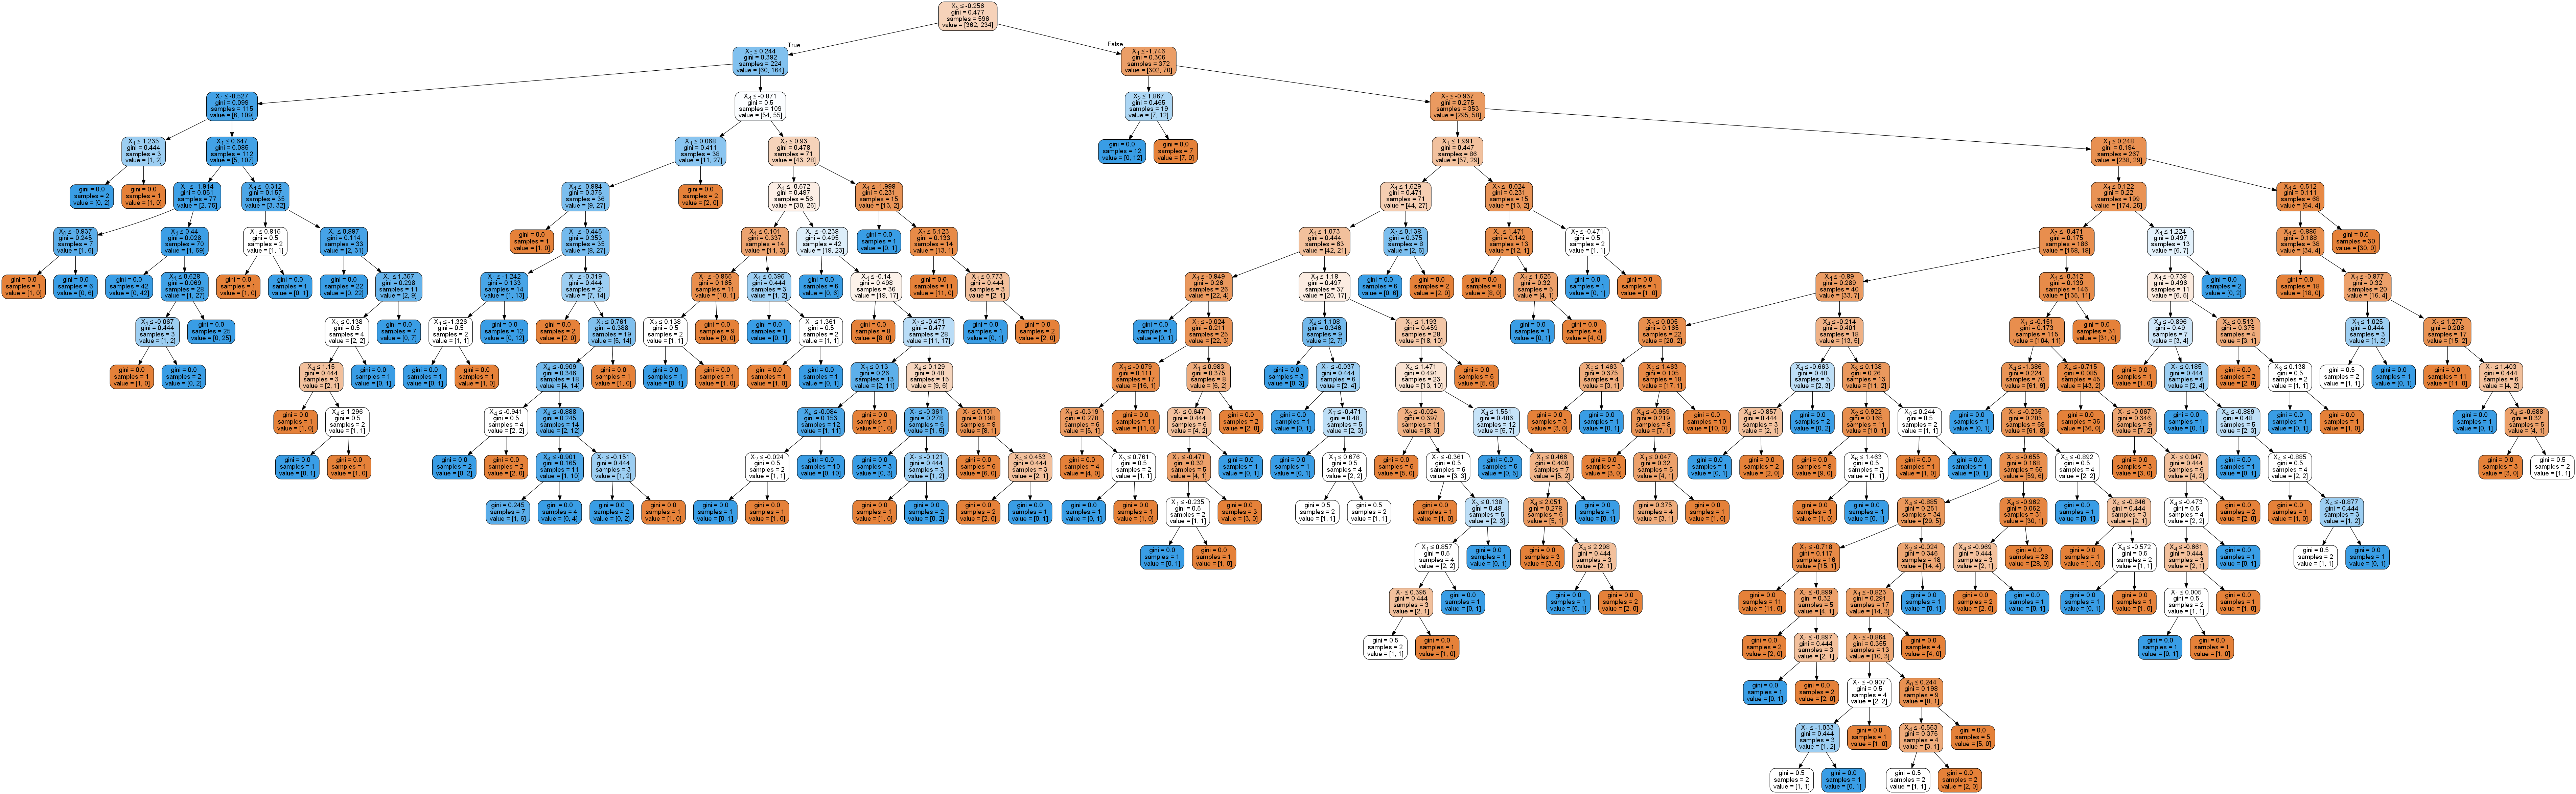

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image   
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO() 
export_graphviz(dt, out_file=dot_data,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=12000, height=12000) 

## Model evaluation using confusion matrix: 

In [38]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[165  22]
 [ 38  70]]


,0
TP,70
TN,165
FP,22
FN,38


### clasification accuracy:¶ 

In [39]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 79.66101694915254


### classification error: 

In [40]:
print("classification error is :",100*(1-accuracy))

classification error is : 20.33898305084746


### Calculating True Positive Rate(TPR), True Nagative Rate(TNR), False Positive Rate(FPR), False Nagative Rate(FNR)  

In [41]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,64.814815
TNR/SPECIFICITY,88.235294
FPR,11.764706
FNR,35.185185


In [42]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.760870
F1_score,0.700000
roc_auc,0.765251


### The accuracy of this model is 79.66% for the given test split of 33% and random state=5 

20 - 0.8351063829787234


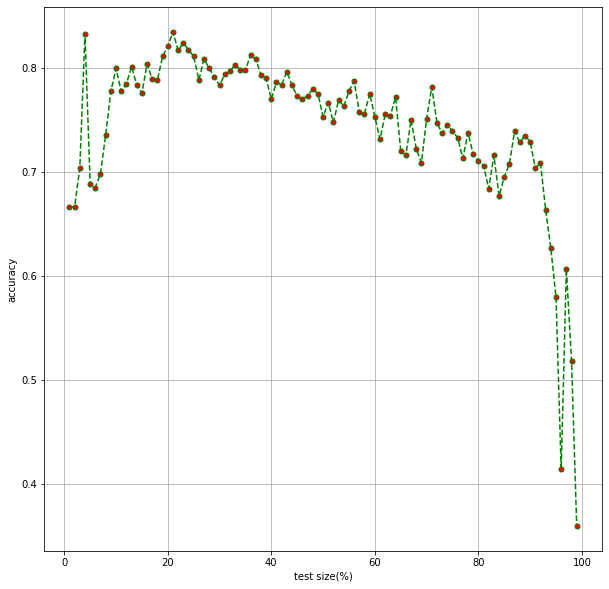

In [43]:
# finding the best values of accuracy by varying test size
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.tree import DecisionTreeClassifier
acc=[]
for i in range(1,100,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i/100,random_state=5)
    scaler=StandardScaler()
    xtrain=scaler.fit_transform(xtrain)
    xtest=scaler.transform(xtest)
    dt=DecisionTreeClassifier()
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy=met.accuracy_score(ytest,ypred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='g',linestyle='dashed',marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size(%)')
plt.ylabel('accuracy')
plt.grid(True)
print(acc.index(max(acc)),'-',max(acc))

# 4) RANDOM FOREST Classifier:

## splitting the data into train and test : 

In [44]:
from sklearn.model_selection import train_test_split
#splitting into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=6)

In [45]:
pd.DataFrame([xtrain.shape , xtest.shape  , ytrain.shape  ,  ytest.shape],index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,712,8.0
xtest,179,8.0
ytrain,712,NaN
ytest,179,NaN


## Scaling the independent variables

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Building the model: 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=6)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [48]:
ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [49]:
ytest

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

## Model evaluation using confusion matrix: 

In [50]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(ytest,ypred)
print(cmat)
TP=cmat[1,1]
TN=cmat[0,0]
FP=cmat[0,1]
FN=cmat[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[99 14]
 [15 51]]


,0
TP,51
TN,99
FP,14
FN,15


### clasification accuracy 

In [51]:
from sklearn import metrics as met
accuracy=met.accuracy_score(ytest,ypred)
print("classification accuracy:",accuracy*100)

classification accuracy: 83.79888268156425


### classification error:

In [52]:
print("classification error is :",100*(1-accuracy))

classification error is : 16.201117318435752


### Calculating True Positive Rate(TPR), True Nagative Rate(TNR), False Positive Rate(FPR), False Nagative Rate(FNR) 

In [53]:
TPR=100*met.recall_score(ytest,ypred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,77.272727
TNR/SPECIFICITY,87.610619
FPR,12.389381
FNR,22.727273


In [54]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(ytest,ypred)
f1=f1_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.784615
F1_score,0.778626
roc_auc,0.824417


### The accuracy of this model is 83.79% for the given test split of 20% and random state=6 

0 - 1.0


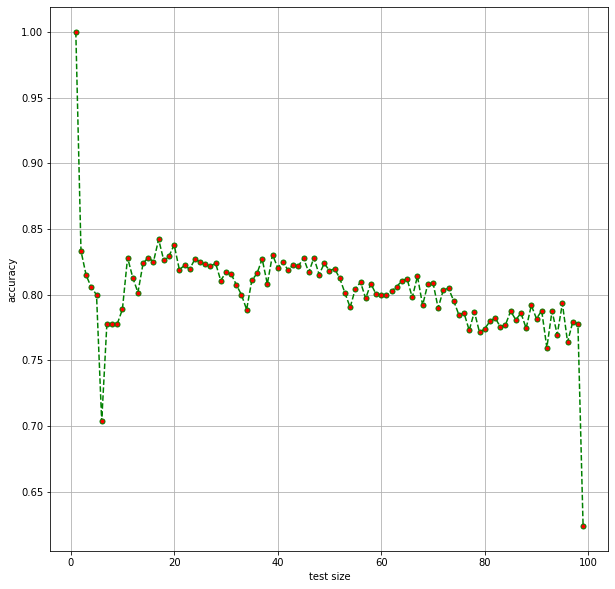

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,100,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=i/100,random_state=6)
    scaler=StandardScaler()
    xtrain=scaler.fit_transform(xtrain)
    xtest=scaler.transform(xtest)
    rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=6)
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    accuracy=met.accuracy_score(ytest,ypred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='g',linestyle='dashed',marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size')
plt.ylabel('accuracy')
plt.grid(True)
print(acc.index(max(acc)),'-',max(acc))

# Inference: 

### From the above classification models,KNN classifier gave highest accuracy on randomly selected samples for a given test split. 